<a href="https://colab.research.google.com/github/emersondivB0/PyProjects/blob/main/DataScience/11_Creating_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd

In [18]:
datos = pd.read_csv('alquiler_residencial.csv', sep=';')
datos.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo Agrupado
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,42.50,Departamento
1,Casa,Lurigancho,2,0,1,100,7000.0,NaN,NaN,70.00,Casa
2,Local comercial,Ate,0,4,0,150,5200.0,4020.0,1111.0,34.67,Departamento
3,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,53.33,Departamento
4,Departamento,Ate,1,0,0,48,800.0,230.0,NaN,16.67,Departamento
5,Departamento,Barranco,3,1,0,70,1200.0,NaN,NaN,17.14,Departamento
6,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,26.00,Departamento
7,Casa en condominio,Ate,5,4,5,750,22000.0,NaN,NaN,29.33,Casa
8,Casa en condominio,El Agustino,2,2,0,65,1000.0,NaN,NaN,15.38,Casa
9,Local comercial,Pachacámac,0,3,0,695,35000.0,19193.0,3030.0,50.36,Departamento


In [19]:
# calculate the mean of 'Valor'
datos['Valor'].mean()

12952.659715265761

In [20]:
# calculate the mean of several columns
# barrios = ['Ate', 'Barranco', 'Comas', 'Lince', 'El Agustino', 'San Luis', 'Callao']
# selection = datos['Distrito'].isin(barrios)
# datos = datos[selection]

In [21]:
datos.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo Agrupado
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,42.50,Departamento
1,Casa,Lurigancho,2,0,1,100,7000.0,NaN,NaN,70.00,Casa
2,Local comercial,Ate,0,4,0,150,5200.0,4020.0,1111.0,34.67,Departamento
3,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,53.33,Departamento
4,Departamento,Ate,1,0,0,48,800.0,230.0,NaN,16.67,Departamento
5,Departamento,Barranco,3,1,0,70,1200.0,NaN,NaN,17.14,Departamento
6,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,26.00,Departamento
7,Casa en condominio,Ate,5,4,5,750,22000.0,NaN,NaN,29.33,Casa
8,Casa en condominio,El Agustino,2,2,0,65,1000.0,NaN,NaN,15.38,Casa
9,Local comercial,Pachacámac,0,3,0,695,35000.0,19193.0,3030.0,50.36,Departamento


In [22]:
datos['Distrito'].drop_duplicates()

0                     San Borja
1                    Lurigancho
2                           Ate
3                    Pachacámac
5                      Barranco
6                         Comas
8                   El Agustino
11                      Mi Perú
16                   Chorrillos
18                     San Luis
19                       Callao
21                   San Miguel
23                   Santa Rosa
25                        Rímac
26                  Punta Negra
29                        Lince
36                  Jesús María
40                   Miraflores
50                        Breña
62                        Ancón
64                  Santa Anita
65      Villa María del Triunfo
80            Villa El Salvador
82                Punta Hermosa
92                     La Perla
95       San Juan de Lurigancho
96                   Chaclacayo
126                Pueblo Libre
129               Puente Piedra
135                       Lurín
143                    La Punta
148     

In [23]:
group_barrio = datos.groupby('Distrito')

In [24]:
type(group_barrio)

pandas.core.groupby.generic.DataFrameGroupBy

In [25]:
group_barrio.groups

{'Ancón': [62, 723, 949, 1844, 1922, 1966, 2157, 2536, 2563, 3217, 4080, 4186, 4425, 5917, 5986, 5987, 6079, 6268, 6675, 6747, 6792, 6809, 7133, 7141, 7347, 7764, 7966, 8615, 9002, 9042, 9365, 9611, 9661, 9771, 9838, 10124, 10814, 11156, 11317, 11729, 11745, 11775, 11867, 12005, 12026, 12458, 12633, 13167, 13454, 14033, 14206, 14580, 14778, 15497, 15720, 15934, 15976, 16042, 16065, 16184, 16427, 16464, 16654, 17065, 17389, 17399, 17479, 17551, 17622, 17670, 18078, 18349, 18439, 18484, 18603, 18832, 18971, 18975, 20507, 20869, 20972, 21178, 21301, 21966, 22131, 22332, 22711, 23236, 23251, 23829, 24142, 24259, 24267, 24294, 24307, 24458, 24496, 25154, 25842, 25885, ...], 'Ate': [2, 4, 7, 20, 22, 30, 35, 41, 44, 49, 59, 60, 76, 78, 81, 89, 90, 91, 93, 97, 103, 104, 111, 112, 115, 117, 134, 146, 155, 156, 157, 158, 159, 163, 165, 168, 172, 176, 179, 192, 194, 197, 199, 203, 225, 228, 230, 247, 248, 251, 255, 260, 261, 274, 277, 281, 306, 315, 325, 330, 332, 340, 347, 348, 354, 358, 364, 36

In [26]:
# I can create an iterator to see all the values
for barrio, data in group_barrio:
  print('{} -> {}'.format(barrio, data.Valor.mean()))

Ancón -> 6610.606060606061
Ate -> 8881.576398683592
Barranco -> 1555.2222222222222
Bellavista -> 20679.438356164384
Breña -> 21260.42600896861
Callao -> 4746.6391184573
Carabayllo -> 3172.5862068965516
Carmen de La Legua -> 2242.5833333333335
Chaclacayo -> 5922.711267605634
Chorrillos -> 18189.990566037737
Cieneguilla -> 1134.6153846153845
Comas -> 9709.934942716858
El Agustino -> 89290.31182795699
Independencia -> 4011.5789473684213
Jesús María -> 5206.555056179775
La Molina -> 2591.217391304348
La Perla -> 13916.439873417721
La Punta -> 7046.25
La Victoria -> 1698.6666666666667
Lima -> 10797.222222222223
Lince -> 105049.1566164154
Los Olivos -> 5871.1325301204815
Lurigancho -> 8987.430939226519
Lurín -> 5260.300429184549
Magdalena del Mar -> 2071.1583333333333
Mi Perú -> 2388.520179372197
Miraflores -> 6788.611111111111
Pachacámac -> 18890.398660986
Pucusana -> 5513.4899328859065
Pueblo Libre -> 8249.630996309963
Puente Piedra -> 47782.12804878049
Punta Hermosa -> 6059.002652519894
P

In [27]:
# I can check just one value:
group_barrio['Valor'].mean().round(2)

Distrito
Ancón                        6610.61
Ate                          8881.58
Barranco                     1555.22
Bellavista                  20679.44
Breña                       21260.43
Callao                       4746.64
Carabayllo                   3172.59
Carmen de La Legua           2242.58
Chaclacayo                   5922.71
Chorrillos                  18189.99
Cieneguilla                  1134.62
Comas                        9709.93
El Agustino                 89290.31
Independencia                4011.58
Jesús María                  5206.56
La Molina                    2591.22
La Perla                    13916.44
La Punta                     7046.25
La Victoria                  1698.67
Lima                        10797.22
Lince                      105049.16
Los Olivos                   5871.13
Lurigancho                   8987.43
Lurín                        5260.30
Magdalena del Mar            2071.16
Mi Perú                      2388.52
Miraflores                   

In [28]:
# I can check more than one value:
group_barrio[['Valor', 'Mantenimiento']].mean().round(2)

,Valor,Mantenimiento
Distrito,,
Ancón,6610.61,1647.16
Ate,8881.58,3560.28
Barranco,1555.22,477.05
Bellavista,20679.44,2354.52
Breña,21260.43,2099.09
Callao,4746.64,764.78
Carabayllo,3172.59,702.61
Carmen de La Legua,2242.58,551.85
Chaclacayo,5922.71,413.06


In [29]:
# calculate the mean grades by sex
alumnos = pd.DataFrame({
'Nombre': ['Ary', 'Katia', 'Denis', 'Beto', 'Bruna', 'Dara', 'Carlos', 'Alice'],
'Sexo': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'],
'Edad': [15, 27, 56, 32, 42, 21, 19, 35],
'Notas': [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6],
'Aprobado': [True, False, False, True, True, True, False, False]},
columns = ['Nombre', 'Edad', 'Sexo', 'Notas', 'Aprobado'])

In [30]:
sexo = alumnos.groupby('Sexo')
sexo = pd.DataFrame(sexo['Notas'].mean().round(2))
sexo.columns = ['Notas Médias']
sexo

,Notas Médias
Sexo,
F,5.82
M,7.12


## Descriptive Statistics

In [31]:
group_barrio['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Distrito,,,,,,,,
Ancón,132.0,6610.61,16352.18,400.0,900.00,1800.0,5550.00,160000.0
Ate,6381.0,8881.58,29913.64,100.0,1990.00,3500.0,8000.00,738197.0
Barranco,90.0,1555.22,2055.89,400.0,712.50,975.0,1200.00,12000.0
Bellavista,73.0,20679.44,95249.73,400.0,800.00,1000.0,1500.00,772549.0
Breña,223.0,21260.43,118867.45,350.0,2400.00,3125.0,4600.00,1324640.0
Callao,726.0,4746.64,36631.77,300.0,1000.00,1500.0,2300.00,800000.0
Carabayllo,58.0,3172.59,10532.87,480.0,850.00,1200.0,1875.00,80000.0
Carmen de La Legua,60.0,2242.58,4415.97,485.0,607.50,1000.0,1700.00,30000.0
Chaclacayo,284.0,5922.71,11813.07,180.0,1000.00,1600.0,7000.00,100000.0


One of the main task for a data science is to analize correctly the data input congruency. In this case, those prices have hihger values than expected.

In [32]:
group_barrio['Valor'].aggregate(['min', 'max']).rename(columns = {'min': 'Minimus', 'max': 'Maximus'})

,Minimus,Maximus
Distrito,,
Ancón,400.0,160000.0
Ate,100.0,738197.0
Barranco,400.0,12000.0
Bellavista,400.0,772549.0
Breña,350.0,1324640.0
Callao,300.0,800000.0
Carabayllo,480.0,80000.0
Carmen de La Legua,485.0,30000.0
Chaclacayo,180.0,100000.0


In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

Text(0.5, 1.0, 'Mean Rent value by district.')

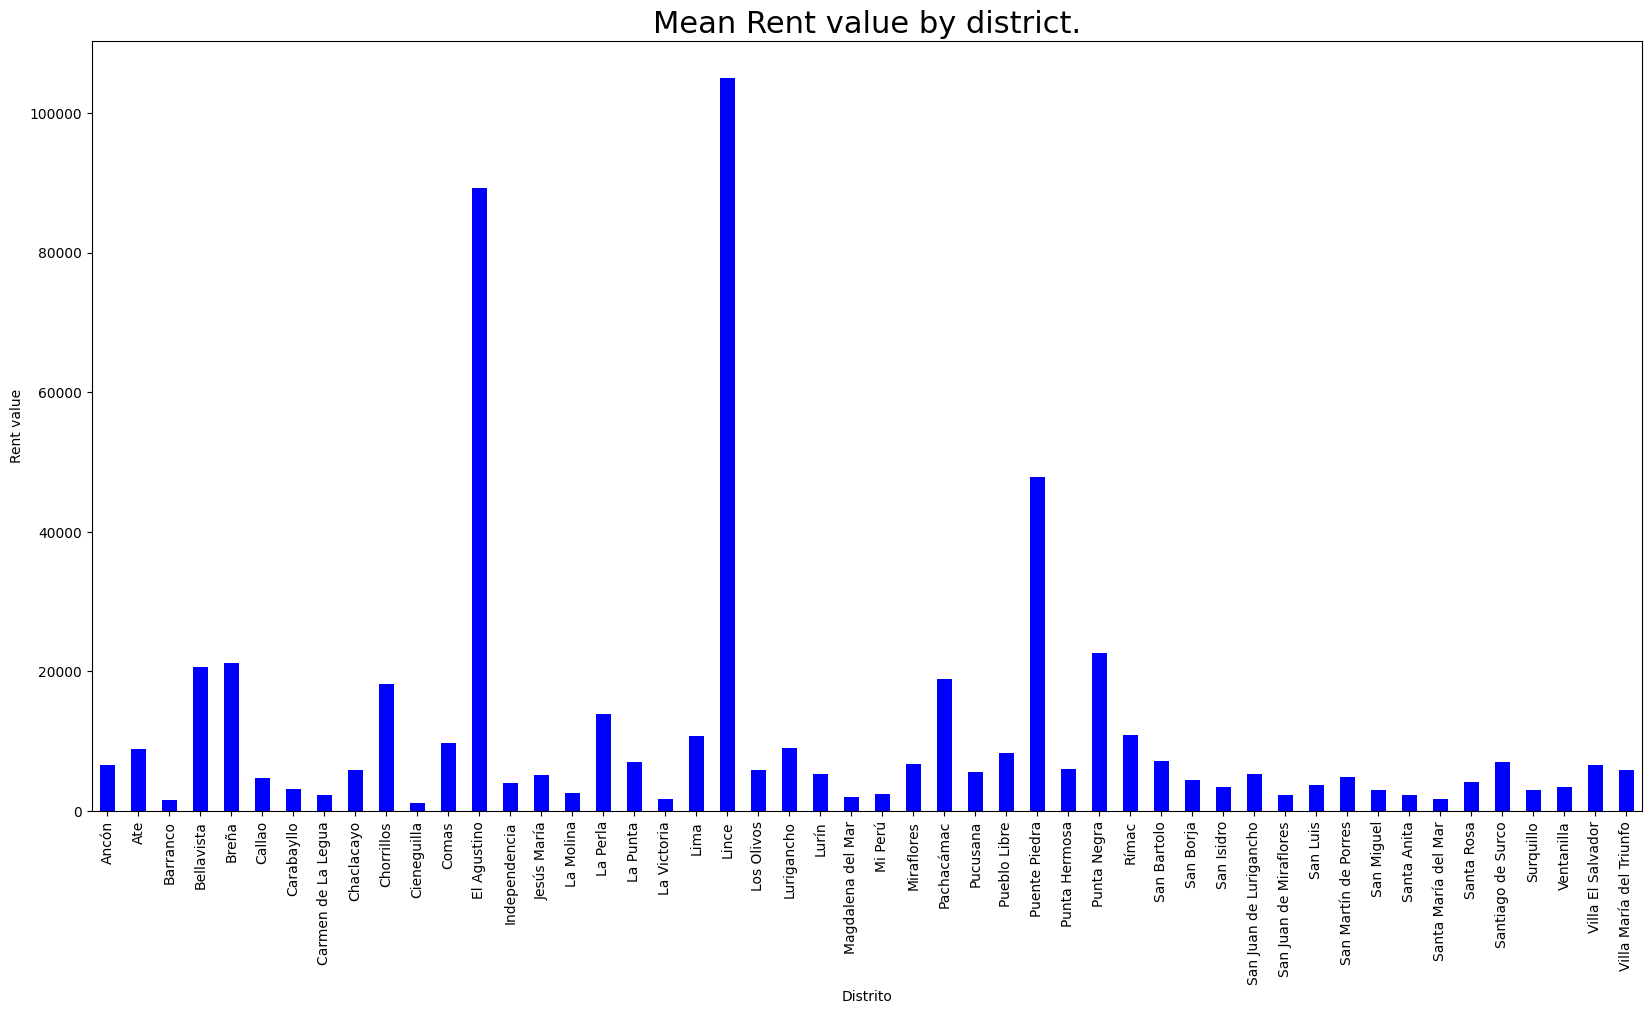

In [34]:
fig = group_barrio['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Rent value')
fig.set_title('Mean Rent value by district.', {'fontsize':22})

Text(0.5, 1.0, 'Mean Rent value by district.')

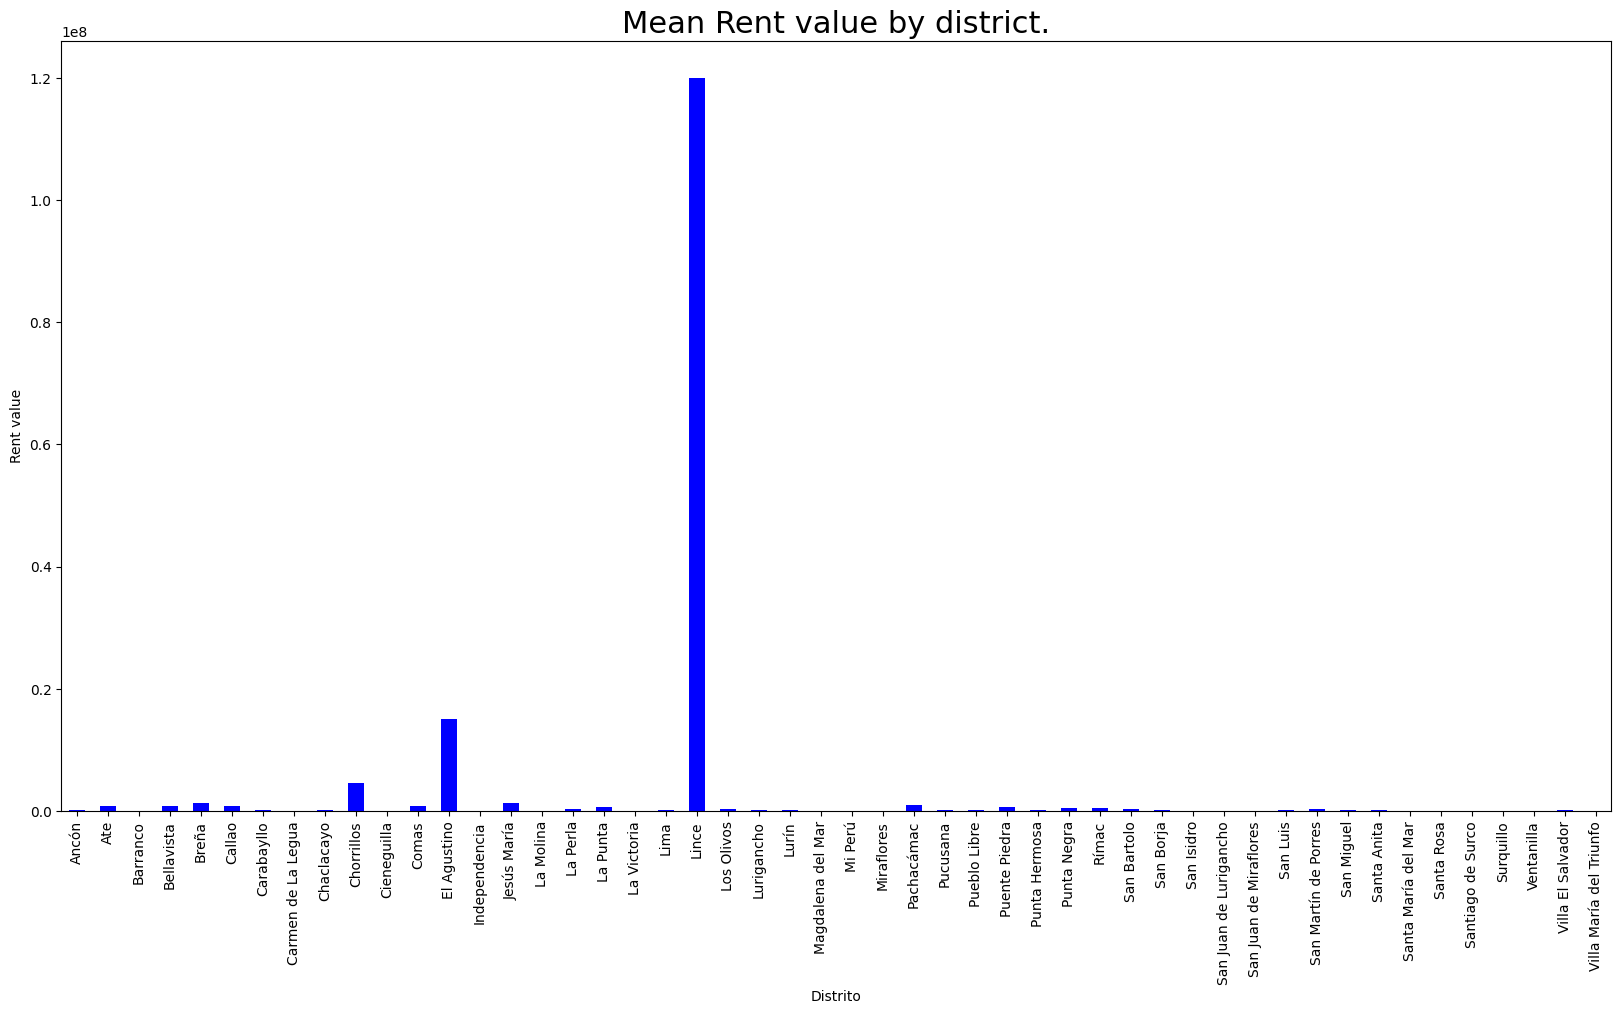

In [35]:
fig = group_barrio['Valor'].max().plot.bar(color = 'blue')
fig.set_ylabel('Rent value')
fig.set_title('Mean Rent value by district.', {'fontsize':22})

These are pointless values